In [24]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [25]:
df= pd.read_csv('hotel_booking.csv')
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,Transient,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,Transient,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,Transient,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 36 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [27]:
df.shape

(119390, 36)

Statistical summary 

In [28]:
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,company,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,119386.000000,119390.000000,119390.000000,119390.000000,119390.000000,119390.000000,103050.000000,6797.000000,119390.000000,119390.000000,119390.000000,119390.000000
mean,0.370416,104.011416,2016.156554,27.165173,15.798241,0.927599,2.500302,1.856403,0.103890,0.007949,0.031912,0.087118,0.137097,0.221124,86.693382,189.266735,2.321149,101.831122,0.062518,0.571363
std,0.482918,106.863097,0.707476,13.605138,8.780829,0.998613,1.908286,0.579261,0.398561,0.097436,0.175767,0.844336,1.497437,0.652306,110.774548,131.655015,17.594721,50.535790,0.245291,0.792798
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,6.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,62.000000,0.000000,69.290000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,179.000000,0.000000,94.575000,0.000000,0.000000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,229.000000,270.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,19.000000,50.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,543.000000,391.000000,5400.000000,8.000000,5.000000


Cleaning the data

1- Handling missing value

In [29]:
# Columns having missing values
df.isnull().sum()

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

Since the missing values in the "company" is high, we will delete them

In [30]:
df = df.drop('company',axis=1)

We will replace the null values under "children" column with mean value of children

In [31]:
df['children'].fillna(df['children'].mean(), inplace = True)

We will replace the null values under "agent" column with zeros

In [32]:
df['agent'] = df['agent'].fillna(0)

We will replace the null values under "country" column with Unknown

In [33]:
df['country'] = df['country'].fillna('Unknown')

In [34]:
df.isnull().sum()

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
agent                             0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces 

2-Removing duplicate rows if any

In [35]:
df.duplicated().sum()

0

There is no duplicate rows 

3-changing datatype of column 'reservation_status_date' to date_type

In [36]:
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 35 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119390 non-null  float64

4-Feature Engineering

From the stays_in_weekend_nights and stays_in_week_nights columns, we can get the total number of days of stay

In [38]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2


In [39]:
df['total_stays'] = df['stays_in_weekend_nights'] + df['stays_in_week_nights']
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date,name,email,phone-number,credit_card,total_stays
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Ernest Barnes,Ernest.Barnes31@outlook.com,669-792-1661,************4322,0
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,0.0,0,0,Check-Out,2015-07-01,Andrea Baker,Andrea_Baker94@aol.com,858-637-6955,************9157,0
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Rebecca Parker,Rebecca_Parker@comcast.net,652-885-2745,************3734,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,75.0,0,0,Check-Out,2015-07-02,Laura Murray,Laura_M@gmail.com,364-656-8427,************5677,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,98.0,0,1,Check-Out,2015-07-03,Linda Hines,LHines@verizon.com,713-226-5883,************5498,2


Remove the stays_in_weekend_nights and stays_in_week_nights columns  because there is already a total_stays column 

In [40]:
df.drop(['stays_in_weekend_nights', 'stays_in_week_nights'], axis = 1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 34 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   adults                          119390 non-null  int64         
 8   children                        119390 non-null  float64       
 9   babies                          119390 non-null  int64         
 10  meal                            119390 non-null  object 

Check the outlier

In [42]:
plt.figure(figsize=(10, 20))
for i in range(0, len(numerical)):
    plt.subplot(4, int(len(numerical)/3), i+1)
    sns.boxplot(y=df[numerical[i]], color='gray', orient='v')
    plt.tight_layout()

NameError: name 'numerical' is not defined

<Figure size 720x1440 with 0 Axes>

In [43]:
df.drop(df[df['adr'] > 5000].index, inplace = True)
df.describe()

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,agent,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests,total_stays
count,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.000000,119389.00000
mean,0.370411,104.011994,2016.156555,27.165292,15.798164,1.856402,0.103891,0.007949,0.031912,0.087119,0.137098,0.221118,74.828845,2.321169,101.786744,0.062518,0.571368,3.42792
std,0.482917,106.863358,0.707479,13.605134,8.780826,0.579263,0.398556,0.097437,0.175768,0.844340,1.497443,0.652304,107.142248,17.594793,48.153554,0.245292,0.792800,2.55744
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.00000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000,0.000000,69.290000,0.000000,0.000000,2.00000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,9.000000,0.000000,94.560000,0.000000,0.000000,3.00000
75%,1.000000,160.000000,2017.000000,38.000000,23.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,152.000000,0.000000,126.000000,0.000000,1.000000,4.00000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,535.000000,391.000000,510.000000,8.000000,5.000000,69.00000


EDA

1- What is the Avarage of ADR?

In [48]:
num_total_sales = df ['adr'].count()
Avg_total_sales = df ['adr'].sum()/num_total_sales

print ('Average of deily rate is:',Avg_total_sales.round(decimals=2))

Average of deily rate is: 101.79


 2-Which hotel has higher bookings?

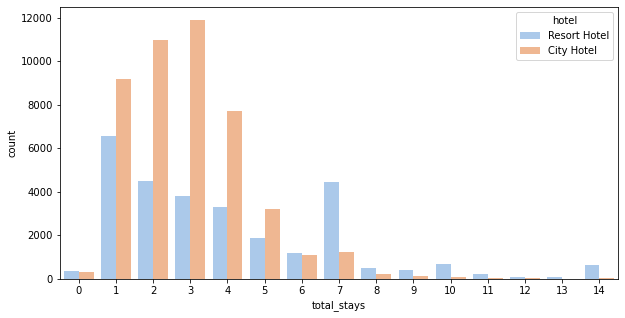

In [49]:
not_canceled = df[df['is_canceled'] == 0]
s1 = not_canceled[not_canceled['total_stays'] < 15]
plt.figure(figsize = (10,5))
sns.countplot(x = s1['total_stays'], hue = s1['hotel'], palette='pastel')
plt.show()

3- 

In [50]:
df['name'].str.split().str[-1].value_counts().head()

Smith       2503
Johnson     1990
Williams    1618
Jones       1434
Brown       1423
Name: name, dtype: int64

4-What is the name of people who had five ‫‪special‬‬ ‫‪request‬‬?

In [70]:
df[df['total_of_special_requests'] == 5][['total_of_special_requests','name']]

,total_of_special_requests,name
7860,5,Amanda Harper
11125,5,Laura Sanders
14596,5,Tommy Ortiz
14921,5,Gilbert Miller
14922,5,Timothy Torres
24630,5,Jennifer Weaver
27288,5,Crystal Horton
27477,5,Brittney Burke
29906,5,Cynthia Cabrera
29949,5,Sarah Floyd


5-What is the 5 names of People who have babies and children?

In [77]:
df['total_children']= df['babies']+df['children']
df.sort_values('total_children', ascending=False).iloc[0:5][['total_children', 'name']]

,total_children,name
46619,10.0,Nicholas Parker
328,10.0,Jamie Ramirez
78656,9.0,Marc Robinson
107837,3.0,Albert French
115799,3.0,Bryan Pierce


6- What is the name of the people who canceled their reservation?

In [82]:
df.sort_values('is_canceled', ascending=False).iloc[0:10][['is_canceled', 'name']]

,is_canceled,name
59695,1,Amy Boyd
61318,1,Justin Finley
61316,1,Wesley Davidson
61315,1,Darlene Miles
61314,1,Heather Cox
61313,1,Gabriela Miller
61312,1,Cynthia Benson
61311,1,Chad Melendez
61310,1,Brian Murray
61309,1,Andrew Nash


7- What is percentage of bookings in each hotel?

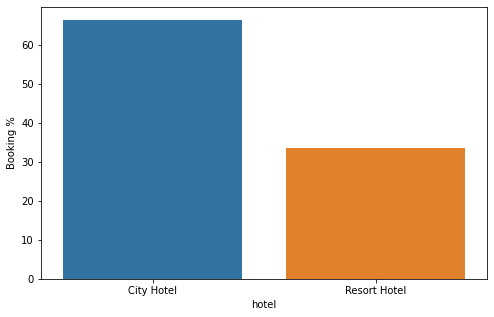

In [86]:
grouped_by_hotel = df.groupby('hotel')
d1 = pd.DataFrame((grouped_by_hotel.size()/df.shape[0])*100).reset_index().rename(columns = {0:'Booking %'})      
plt.figure(figsize = (8,5))
sns.barplot(x = d1['hotel'], y = d1['Booking %'] )
plt.show()

8- What is the top 10 Countries most of the customers visit these hotels ?

Text(0, 0.5, 'Reservation Count')

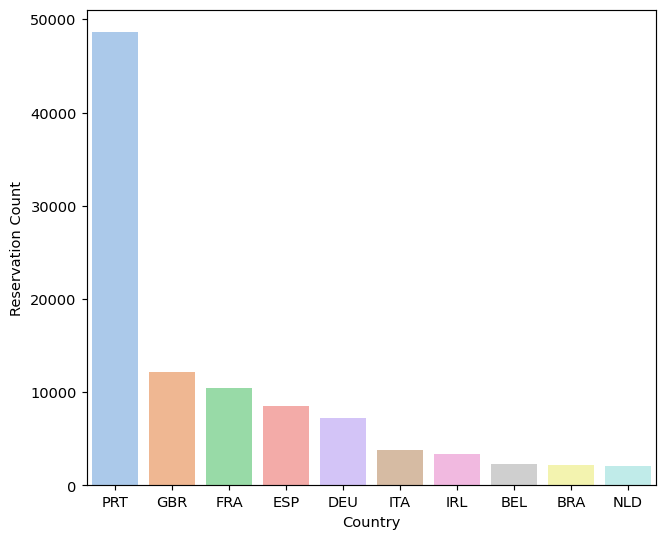

In [87]:
plt.figure(figsize=(7,6), dpi=105)

sns.countplot(data=df, x='country',order=pd.value_counts(df['country']).iloc[:10].index,
             palette='pastel')


plt.xlabel('Country')
plt.ylabel('Reservation Count')

9-What is the busiest months?

Text(0, 0.5, 'Reservation Count')

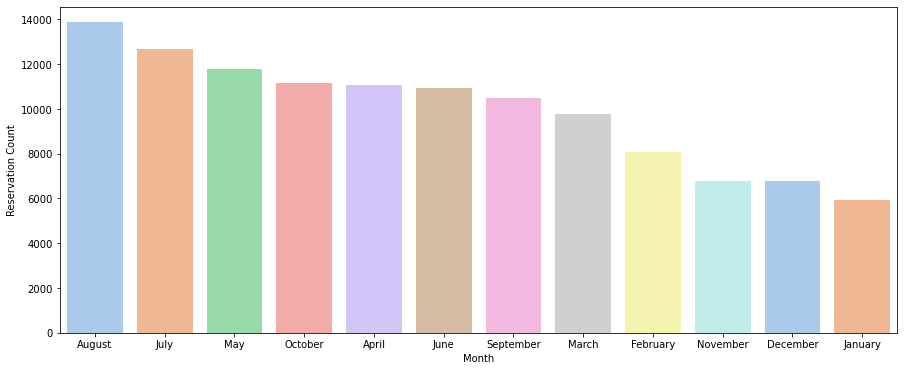

In [88]:
month_sorted = ['January','February','March','April','May','June','July','August','September','October','November','December']

plt.figure(figsize=(15,6))
sns.countplot(data=df ,x='arrival_date_month', palette='pastel',
              order=df.value_counts(df['arrival_date_month']).index)


plt.xlabel('Month')
plt.ylabel('Reservation Count')

10-What is the ercentage of cancelled and Not cancelled bookings.

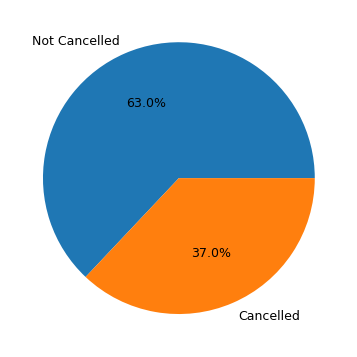

In [89]:
plt.figure(figsize=(7,5), dpi=90)
proportion = df['is_canceled'].value_counts()

labels = ['Not Cancelled','Cancelled']
  
plt.pie(proportion, labels=labels, autopct = '%1.1f%%' )
plt.show()

11-What is the number of Special Requests?

In [90]:
df['total_of_special_requests'].value_counts(normalize = True)

0    0.588974
1    0.278300
2    0.108628
3    0.020915
4    0.002848
5    0.000335
Name: total_of_special_requests, dtype: float64

 The correlation between the features

<AxesSubplot:>

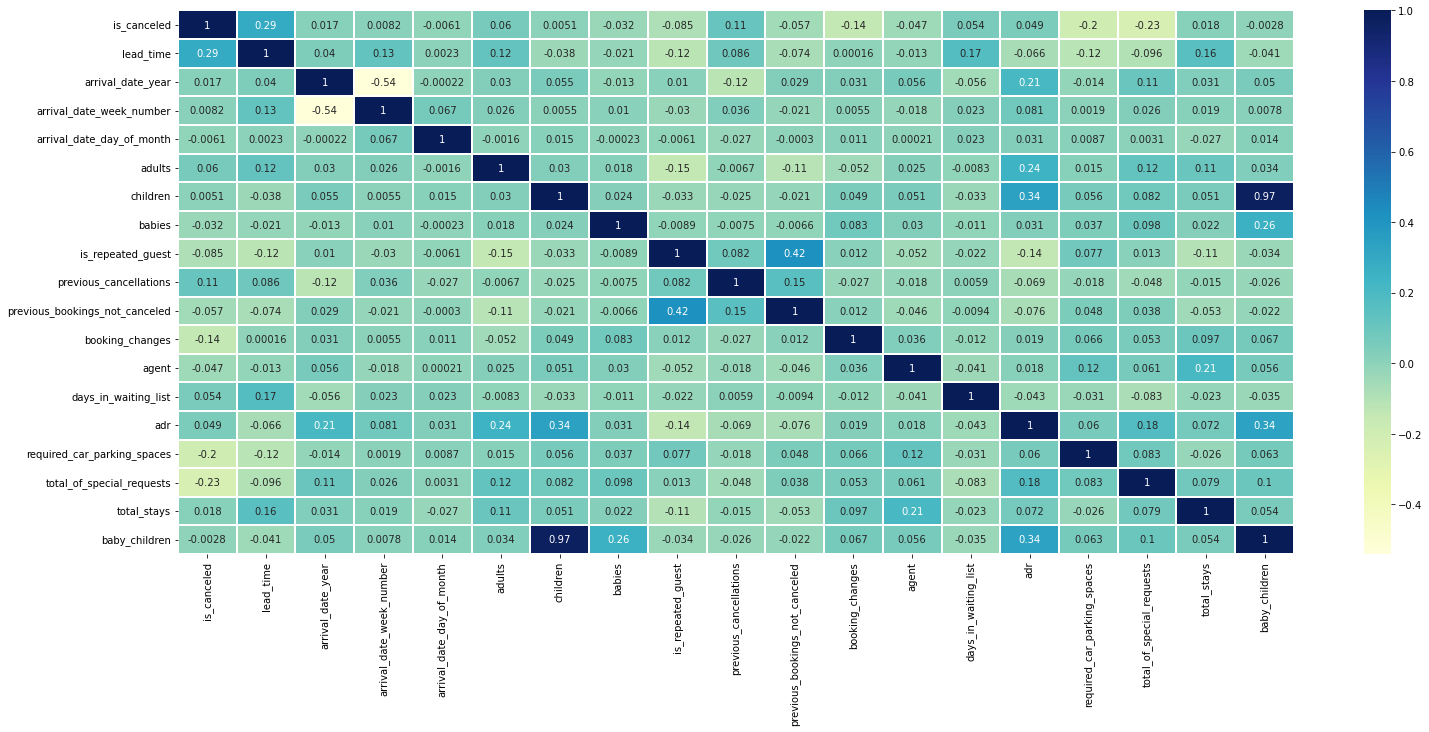

In [283]:
plt.figure(figsize=(25,10))
sns.heatmap(df.corr(),annot=True,linewidths=2, cmap = 'YlGnBu')

3- Machine learning model

In [284]:
df.drop(['days_in_waiting_list', 'arrival_date_year', 'arrival_date_year', 'assigned_room_type', 'booking_changes',
               'reservation_status', 'country', 'days_in_waiting_list'], axis = 1, inplace=True)

le=LabelEncoder()
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'])
df['year'] = df['reservation_status_date'].dt.year
df['month'] = df['reservation_status_date'].dt.month
df['day'] = df['reservation_status_date'].dt.day
df.drop(['reservation_status_date','arrival_date_month'] , axis = 1, inplace = True)

a = df.select_dtypes(object).columns
cat_list = []
for i in a:
    print (i, df[i].nunique())
    cat_list.append(i)

hotel 2
meal 5
market_segment 8
distribution_channel 5
reserved_room_type 10
deposit_type 3
customer_type 4
name 81502
email 115888
phone-number 119389
credit_card 9000


In [285]:
for i in cat_list:
    df[i] = le.fit_transform(df[i])
df['year'] = le.fit_transform(df['year'])
df['month'] = le.fit_transform(df['month'])
df['day'] = le.fit_transform(df['day'])

In [286]:
y = df['is_canceled']
X = df.drop('is_canceled', axis = 1)
X_train, X_test, y_train, y_test = train_test_split(X,y,random_state=46,test_size=0.3)

In [287]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [288]:
model_dtc = DecisionTreeClassifier()
model_dtc.fit(X_train, y_train)
y_pred = model_dtc.predict(X_test)
acc_dtc = accuracy_score(y_test, y_pred)
print ('Test Accuracy : {:.2f}%'.format(acc_dtc*100))
print(classification_report(y_test, y_pred))

Test Accuracy : 93.66%
              precision    recall  f1-score   support

           0       0.95      0.95      0.95     22577
           1       0.91      0.92      0.91     13240

    accuracy                           0.94     35817
   macro avg       0.93      0.93      0.93     35817
weighted avg       0.94      0.94      0.94     35817



In [289]:
y_pred

array([0, 0, 0, ..., 0, 0, 1])

In [290]:
y_test

88381     0
95545     0
83518     0
67592     1
20592     0
         ..
48041     1
83630     0
113288    0
14374     1
52801     1
Name: is_canceled, Length: 35817, dtype: int64

In [291]:
y_test.values

array([0, 0, 0, ..., 0, 1, 1])

In [292]:
df['is_canceled'].value_counts()

0    75166
1    44223
Name: is_canceled, dtype: int64